In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [0]:
# import os
# from os.path import exists, join, basename, splitext

# git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
# project_name = splitext(basename(git_repo_url))[0]
# if not exists(project_name):
#   # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
#   # install new CMake becaue of CUDA10
#   !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
#   !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
#   # clone openpose
#   !git clone -q --depth 1 $git_repo_url
#   !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
#   # install system dependencies
#   !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
#   # install python dependencies
#   !pip install -q youtube-dl
#   # build openpose
#   !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
#from google.colab import drive
#drive.mount('/content/gdrive')
! unzip drive/My\ Drive/workshop/openpose_builded.zip
    
from IPython.display import YouTubeVideo

Archive:  drive/My Drive/workshop/openpose_builded.zip
   creating: openpose/
  inflating: openpose/README.md      
   creating: openpose/.github/
  inflating: openpose/.github/stale.yml  
  inflating: openpose/.github/issue_template.md  
  inflating: openpose/.github/Logo_main_black.png  
   creating: openpose/scripts/
   creating: openpose/scripts/travis/
  inflating: openpose/scripts/travis/run_make.sh  
  inflating: openpose/scripts/travis/configure_make.sh  
  inflating: openpose/scripts/travis/configure_cmake.sh  
  inflating: openpose/scripts/travis/install_deps_ubuntu.sh  
  inflating: openpose/scripts/travis/run_tests.sh  
  inflating: openpose/scripts/travis/configure.sh  
  inflating: openpose/scripts/travis/install_deps_osx.sh  
  inflating: openpose/scripts/travis/defaults.sh  
  inflating: openpose/scripts/generate_gh_pages.sh  
   creating: openpose/scripts/tests/
  inflating: openpose/scripts/tests/pose_time_visual_GUI.sh  
  inflating: openpose/scripts/tests/pose_accur

## Detect poses on a test video

We are going to detect poses on the following youtube video:

In [0]:
! apt-get -qq install -y  libgflags-dev libgoogle-glog-dev
! pip install youtube-dl
YOUTUBE_ID = 'lnXL9JeKW2E'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [0]:
!rm -rf youtube.mp4


In [0]:
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID


[youtube] lnXL9JeKW2E: Downloading webpage
[youtube] lnXL9JeKW2E: Downloading video info webpage
[youtube] lnXL9JeKW2E: Downloading js player vflrnurMS
[youtube] lnXL9JeKW2E: Downloading js player vflrnurMS
[youtube] lnXL9JeKW2E: Downloading MPD manifest
[dashsegments] Total fragments: 36
[download] Destination: youtube.mp4
[download] 100% of 10.82MiB in 00:52


In [0]:
# cut the first seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 20 video.mp4


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!rm -rf /content/content

In [0]:
!unzip /content/drive/My\ Drive/workshop/jsons/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56..zip

Archive:  /content/drive/My Drive/workshop/jsons/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56..zip
 extracting: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000739_keypoints.json  
 extracting: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000664_keypoints.json  
 extracting: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000735_keypoints.json  
  inflating: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000174_keypoints.json  
 extracting: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000627_keypoints.json  
  inflating: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000204_keypoints.json  
  inflating: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23-00:04:56._000000000312_keypoints.json  
  inflating: content/json/el-idiota-hakuchi-de-akira-kurosawa-1951_00:00:23

In [0]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import plotly.offline as py
import plotly.graph_objs as go
#import imageio
import glob

In [0]:
keypoints = [
    "Nose",
    "Neck",
    "RShoulder",
    "RElbow",
    "RWrist",
    "LShoulder",
    "LElbow",
    "LWrist",
    "MidHip",
    "RHip",
    "RKnee",
    "RAnkle",
    "LHip",
    "LKnee",
    "LAnkle",
    "REye",
    "LEye",
    "REar",
    "LEar",
    "LBigToe",
    "LSmallToe",
    "LHeel",
    "RBigToe",
    "RSmallToe",
    "RHeel",
    # "Background"
]

In [0]:
import os
import json
from collections import defaultdict as dd
keypoint_peolpe_coords = {k: dd(list) for k in keypoints}
people_keypoint_coords = dd(lambda : {k: list() for k in keypoints})

def parse_2d_keypoints_array(keypoints_array):
    x_coords = []
    y_coords = []
    probas = []
    for keypoint_idx, keypoint_value in enumerate(keypoints_array["pose_keypoints_2d"]):
        if keypoint_idx % 3 == 0:
            #x coord
            x_coords.append(keypoint_value)
        elif keypoint_idx % 3 == 1:
            # y coord
            y_coords.append(keypoint_value)
        elif keypoint_idx % 3 == 2:
            # proba
            probas.append(keypoint_value)

    assert len(x_coords) == len(y_coords)
    assert len(x_coords) == len(probas)

    res = {keypoint: coords 
           for keypoint, coords in zip(keypoints, 
                                       [{"x": x_val, "y": y_val, "proba": proba} 
                                        for x_val, y_val, proba in zip(x_coords, y_coords, probas)])}

    return res



face_points = [str(i) for i in range(70)]

def parse_2d_facepoints_array(facepoints_array):
    x_coords = []
    y_coords = []
    probas = []
    for keypoint_idx, keypoint_value in enumerate(facepoints_array["face_keypoints_2d"]):
        if keypoint_idx % 3 == 0:
            #x coord
            x_coords.append(keypoint_value)
        elif keypoint_idx % 3 == 1:
            # y coord
            y_coords.append(keypoint_value)
        elif keypoint_idx % 3 == 2:
            # proba
            probas.append(keypoint_value)

    assert len(x_coords) == len(y_coords)
    assert len(x_coords) == len(probas)
    #print()
    res = {keypoint: coords 
           for keypoint, coords in zip(face_points, 
                                       [{"x": x_val, "y": y_val, "proba": proba} 
                                        for x_val, y_val, proba in zip(x_coords, y_coords, probas)])}
    
    return res

In [0]:

#%%
def get_distance(right_point, left_point):
    right_x = right_point['x']
    right_y = right_point['y']

    left_x = left_point['x']
    left_y = left_point['y']

    delta_x = abs(left_x - right_x)
    delta_y = abs(left_y - right_y)

    distance = math.sqrt(abs(delta_x ** 2 + delta_y ** 2))

    return distance

# https://medium.com/@manivannan_data/find-the-angle-between-three-points-from-2d-using-python-348c513e2cd
def getAngleNew(a, b, c):
    cos = math.cos(math.atan((c['y']-b['y']) / (c['x']-b['x'])) +
                   math.atan((a['y']-b['y']) / (a['x']-b['x'])))
    return cos 

# def getAngle(a, b, c):
#     ang = math.degrees(math.atan2(c['y']-b['y'], c['x']-b['x']) - math.atan2(a['y']-b['y'], a['x']-b['x']))
#     ang = ang + 360 if ang < 0 else ang
#     ang = 360 - ang if ang > 180 else ang
#     return ang


def getAngle(a, b, c):
    v1 = {'x':a['x']-b['x'], 'y': a['y']-b['y']}
    v2 = {'x':c['x']-b['x'], 'y': c['y']-b['y']}
    scalar_mult = v1['x']*v2['x']+v1['y']*v2['y']
    len_mult = math.sqrt((v1['x']**2 + v1['y']**2)*(v2['x']**2 + v2['y']**2))
    angle = math.acos(scalar_mult/len_mult) if len_mult else 0
    return angle

In [0]:
import math

def get_distance(right_point, left_point):
    right_x = right_point['x']
    right_y = right_point['y']

    left_x = left_point['x']
    left_y = left_point['y']

    delta_x = abs(left_x - right_x)
    delta_y = abs(left_y - right_y)

    distance = math.sqrt(abs(delta_x ** 2 + delta_y ** 2))

    return distance

def get_transformed_points(kx, ky, point1, point2):
  return [{'x':point1['x']*kx, 'y': point1['y']*ky}, {'x': point2['x']*kx, 'y': point2['y']*ky}]

def get_face_diff(kx, ky, point1_old, point2_old, point1_new, point2_new):
  transformed_points = get_transformed_points(kx, ky, point1_old, point2_old)
  len_transformed = get_distance(transformed_points[0], transformed_points[1])
  len_cur = get_distance(point1_new, point2_new)
  return len_cur

In [0]:
def process():
    
    
    
    
#     !rm -rf youtube.mp4
#     !rm -rf video.mp4
#     !youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={youtube_id}
#     !ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video_tmp.mp4
#     !ffmpeg -i video_tmp.mp4 -vf scale=320:240 video.mp4
#     # detect poses
#     !rm openpose.avi
#     !cd openpose && ./build/examples/openpose/openpose.bin --face --video ../video.mp4 --write_json ./output/ --display 0 --render_pose 0 #--write_video ../openpose.avi


    
    keypoint_peolpe_coords = {k: dd(list) for k in keypoints+face_points}
    people_keypoint_coords = dd(lambda : {k: list() for k in keypoints+face_points})
    
    
    
    

    all_files_people_to_keypoint_idxs = []
    #res_dir = "/content/content/json"
    res_dir = '/content/drive/My Drive/json'
    for fn in os.listdir(res_dir):    
        keypoints_coords_f = {} # list of persons
        people_to_keypoint_idxs = {}
        with open(os.path.join(res_dir, fn), 'r', encoding="utf-8") as f:
            f_json = json.load(f)
            for people_idx, people_info in enumerate(f_json["people"]):
                people_to_keypoint_idxs[people_idx] = parse_2d_keypoints_array(people_info)
                face_tmp = parse_2d_facepoints_array(people_info)
                for facepoint_name in face_points:
                    #print(face_tmp)
                    people_to_keypoint_idxs[people_idx][facepoint_name] = face_tmp[facepoint_name]
                    
                
                all_files_people_to_keypoint_idxs.append(people_to_keypoint_idxs)

    

    for entry in all_files_people_to_keypoint_idxs:
        for people_idx, people_keypoints in entry.items():
            for keypoint in keypoints + face_points:
                keypoint_peolpe_coords[keypoint][people_idx].append(people_keypoints[keypoint])
                people_keypoint_coords[people_idx][keypoint].append(people_keypoints[keypoint])


    
    frames_num = len(list(people_keypoint_coords[0].values())[0])
    good_people_keypoint_coords = dd(dict)
    
    
    
    
    
    
    for people_num in people_keypoint_coords.keys():
        for kp_name in people_keypoint_coords[people_num].keys():
            if (sum([elem['x'] == elem['y'] 
                     for elem in people_keypoint_coords[people_num][kp_name]]) 
                / frames_num) < 0.1 :

                good_people_keypoint_coords[people_num][kp_name] = people_keypoint_coords[people_num][kp_name]

    #%%
    
    first_person_kp_coord = people_keypoint_coords[0]


    shoulders_deltas = []
    num_of_frames = len(people_keypoint_coords[0]["RShoulder"])



    # region read first keypoint coords into variables
    RShoulder_cur = first_person_kp_coord["RShoulder"][0]
    RElbow_cur = first_person_kp_coord["RElbow"][0]
    RWrist_cur = first_person_kp_coord["RWrist"][0]
    LShoulder_cur = first_person_kp_coord["LShoulder"][0]
    LElbow_cur = first_person_kp_coord["LElbow"][0]
    LWrist_cur = first_person_kp_coord["LWrist"][0]
    Neck_cur = first_person_kp_coord["Neck"][0]
    Nose_cur = first_person_kp_coord["Nose"][0]
    MidHip_cur = first_person_kp_coord["MidHip"][0]
    REye_cur = first_person_kp_coord["REye"][0]
    LEye_cur = first_person_kp_coord["LEye"][0]
    REar_cur = first_person_kp_coord["REar"][0]
    LEar_cur = first_person_kp_coord["LEar"][0]
     
    # endregion

    #region
    
    #endregion
    
    # region calc shoulders and elbows angles
    Left_elbow_angle_cur = getAngle(LShoulder_cur, LElbow_cur, LWrist_cur)
    Right_elbow_angle_cur = getAngle(RShoulder_cur, RElbow_cur, RWrist_cur)
    Left_shoulder_angle_cur = getAngle(Neck_cur, LShoulder_cur, LElbow_cur)
    Right_shoulder_angle_cur = getAngle(Neck_cur, RShoulder_cur, RElbow_cur)
    # endregion

    Shoulders_len_cur = get_distance(RShoulder_cur, LShoulder_cur)
    Eyes_len_cur = get_distance(REye_cur, LEye_cur)
    Nose_height_cur = get_distance(Nose_cur, MidHip_cur)


    keypoint_deltas = {kp_name: [] for kp_name in keypoints + face_points}
    shoulders_rotations_deltas = []
    eyes_rotations_deltas = []
    right_elbows_deltas = []
    left_elbows_deltas = []
    right_shoulders_deltas = []
    left_shoulders_deltas = []
    Eyel_height_li = []
    Eyer_height_li = []
    Browl_height_li = []
    Browr_height_li = []
    Browl_width_li = []
    Browr_width_li = []
    Brows_distance_li = []
    
    Shoulders_rotate_prev = 0
    
    Left_elbow_angle_prev = Left_elbow_angle_cur
    Right_elbow_angle_prev = Right_elbow_angle_cur
    Left_shoulder_angle_prev = Left_shoulder_angle_cur
    Right_shoulder_angle_prev = Right_shoulder_angle_cur

    Shoulders_len_prev = Shoulders_len_cur
    Eyes_len_prev = Eyes_len_cur
    Nose_height_prev = Nose_height_cur
    for frame_num in range(1, num_of_frames):
        # region read keypoint coords into variables
        RShoulder_cur = first_person_kp_coord["RShoulder"][frame_num]
        RElbow_cur = first_person_kp_coord["RElbow"][frame_num]
        RWrist_cur = first_person_kp_coord["RWrist"][frame_num]
        LShoulder_cur = first_person_kp_coord["LShoulder"][frame_num]
        LElbow_cur = first_person_kp_coord["LElbow"][frame_num]
        LWrist_cur = first_person_kp_coord["LWrist"][frame_num]
        Neck_cur = first_person_kp_coord["Neck"][frame_num]
        Nose_cur = first_person_kp_coord["Nose"][frame_num]
        MidHip_cur = first_person_kp_coord["MidHip"][frame_num]
        
        REye_cur = first_person_kp_coord["REye"][frame_num]
        LEye_cur = first_person_kp_coord["LEye"][frame_num]
        
        REar_cur = first_person_kp_coord["REar"][frame_num]
        LEar_cur = first_person_kp_coord["LEar"][frame_num]
        
        LBrowMid_cur = first_person_kp_coord['24'][frame_num]
        RBrowMid_cur = first_person_kp_coord['19'][frame_num]
        LBrowL_cur = first_person_kp_coord['45'][frame_num]
        LBrowR_cur = first_person_kp_coord['42'][frame_num]
        RBrowL_cur = first_person_kp_coord['39'][frame_num]
        RBrowR_cur = first_person_kp_coord['36'][frame_num]
        
        REyeTop_cur = first_person_kp_coord['37'][frame_num]
        REyeBottom_cur = first_person_kp_coord['41'][frame_num]
        LEyeTop_cur = first_person_kp_coord['44'][frame_num]
        LEyeBottom_cur = first_person_kp_coord['46'][frame_num]
        
        LPupil_cur = first_person_kp_coord['69'][frame_num]
        RPupil_cur = first_person_kp_coord['68'][frame_num]
        
        LPupil_cur = first_person_kp_coord['69'][frame_num]
        RPupil_cur = first_person_kp_coord['68'][frame_num]
        
        MouthTop = first_person_kp_coord['62'][frame_num]
        MouthBottom = first_person_kp_coord['66'][frame_num]
        
        MouthLeft = first_person_kp_coord['62'][frame_num]
        MouthRight = first_person_kp_coord['66'][frame_num]
        # endregion

        
        #region prev
        LBrowMid_prev = first_person_kp_coord['24'][frame_num-1]
        RBrowMid_prev = first_person_kp_coord['19'][frame_num-1]
        LBrowL_prev = first_person_kp_coord['45'][frame_num-1]
        LBrowR_prev = first_person_kp_coord['42'][frame_num-1]
        RBrowL_prev = first_person_kp_coord['39'][frame_num-1]
        RBrowR_prev = first_person_kp_coord['36'][frame_num-1]
        
        REyeTop_prev = first_person_kp_coord['37'][frame_num-1]
        REyeBottom_prev = first_person_kp_coord['41'][frame_num-1]
        LEyeTop_prev = first_person_kp_coord['44'][frame_num-1]
        LEyeBottom_prev = first_person_kp_coord['46'][frame_num-1]
        
        LPupil_prev = first_person_kp_coord['69'][frame_num-1]
        RPupil_prev = first_person_kp_coord['68'][frame_num-1]
        #endregion
        
        
        # region calc shoulders and elbows angles
        Left_elbow_angle_cur = getAngle(LShoulder_cur, LElbow_cur, LWrist_cur)
        Right_elbow_angle_cur = getAngle(RShoulder_cur, RElbow_cur, RWrist_cur)
        Left_shoulder_angle_cur = getAngle(Neck_cur, LShoulder_cur, LElbow_cur)
        Right_shoulder_angle_cur = getAngle(Neck_cur, RShoulder_cur, RElbow_cur)

        Left_elbow_angle_delta = abs(Left_elbow_angle_cur - Left_elbow_angle_prev)
        Right_elbow_angle_delta = abs(Right_elbow_angle_cur - Right_elbow_angle_prev)
        Left_shoulder_angle_delta = abs(Left_shoulder_angle_cur - Left_shoulder_angle_prev)
        Right_shoulder_angle_delta = abs(Right_shoulder_angle_cur - Right_shoulder_angle_prev)


        right_elbows_deltas.append(Right_elbow_angle_cur)
        left_elbows_deltas.append(Left_elbow_angle_cur)
        right_shoulders_deltas.append(Right_shoulder_angle_cur)
        left_shoulders_deltas.append(Left_shoulder_angle_cur)


        # region head and shoulders rotation metrics
        Shoulders_len_cur = get_distance(RShoulder_cur, LShoulder_cur)
        Eyes_len_cur = get_distance(REye_cur, LEye_cur)
        Nose_height_cur = get_distance(Nose_cur, MidHip_cur)
        
        
        Rotate_head_Scale_cur_XY = Eyes_len_cur / Eyes_len_prev if Eyes_len_prev else 1
        #Rotate_head_Scale_cur_XZ = 
        Rotate_head_Scale_cur_YZ = Nose_height_cur / Nose_height_prev if Nose_height_prev else 1
        
        
#         # endregion
            
#         # YZ
        Eyel_height = get_face_diff(1, Rotate_head_Scale_cur_YZ, LEyeTop_cur, LEyeBottom_cur, LEyeTop_cur, LEyeBottom_cur)
        Eyel_height_li.append(Eyel_height)
        Eyer_height = get_face_diff(1, Rotate_head_Scale_cur_YZ, REyeTop_cur, REyeBottom_cur, REyeTop_cur, REyeBottom_cur)
        Eyer_height_li.append(Eyer_height)
#         # YZ
        Browl_height = get_face_diff(1, Rotate_head_Scale_cur_YZ, LBrowMid_prev, LEyeTop_prev, LBrowMid_cur, LEyeTop_cur)
        Browl_height_li.append(Browl_height)
        Browr_height = get_face_diff(1, Rotate_head_Scale_cur_YZ, RBrowMid_prev, REyeTop_prev, RBrowMid_cur, REyeTop_cur)
        Browr_height_li.append(Browr_height)
#         # XY
        Browl_width = get_face_diff(Rotate_head_Scale_cur_XY, 1, LBrowL_prev, LBrowR_prev, LBrowL_cur, LBrowR_cur)
        Browl_width_li.append(Browl_width)
        Browr_width = get_face_diff(Rotate_head_Scale_cur_XY, 1, RBrowL_prev, RBrowR_prev, RBrowL_cur, RBrowR_cur)
        Browr_width_li.append(Browr_width)
#         # XY
        Brows_distance = get_face_diff(Rotate_head_Scale_cur_XY, 1, LBrowR_prev, RBrowL_prev, LBrowR_cur, RBrowL_cur)
        Brows_distance_li.append(Brows_distance)
        
        """
#         # YZ
        Mouth_height = get_face_diff(Rotate_head_Scale_cur_XY, 1, old1, old2, new1, new2)
        
#         # XY
        Mouth_width = get_face_diff(Rotate_head_Scale_cur_XY, 1, old1, old2, new1, new2)
        
#         # YZ
        chin_to_lips_l = get_face_diff(1, Rotate_head_Scale_cur_YZ, old1, old2, new1, new2)
        chin_to_lips_r = get_face_diff(1, Rotate_head_Scale_cur_YZ, old1, old2, new1, new2)
        
       # pupil_45_to_16_rotate_cur = get_face_diff(Rotate_head_Scale_cur_XY, Rotate_head_Scale_cur_YZ, old1, old2, new1, new2)
        
        """
        
        Zoom_scale_cur = Nose_height_cur / Nose_height_prev if Nose_height_prev else 1

        # Shoulders_len_cur = rotate + zoom * Shoulders_len_prev
        Shoulders_rotate_cur = Shoulders_len_cur - Zoom_scale_cur * Shoulders_len_prev
        
#         Slope_rotate_cur = Slope_rotate_prev - Zoom_scale_cur * Slope_rotate_cur
        
    
        head_rotation_cur = Shoulders_rotate_cur / Shoulders_rotate_prev if Shoulders_rotate_prev else 1 
        Eyes_rotate_cur = Eyes_len_cur - head_rotation_cur * Eyes_len_prev
        # endregion
        shoulders_rotations_deltas.append(Shoulders_rotate_cur)
        eyes_rotations_deltas.append(Eyes_rotate_cur)
        
        


        # region calc keypoint deltas
        # kp stands for keypoint
        for kp_name in keypoints + face_points:
            kp_coord_prev = first_person_kp_coord[kp_name][frame_num - 1]
            kp_coord_cur = first_person_kp_coord[kp_name][frame_num]
            kp_delta = get_distance(kp_coord_cur, kp_coord_prev)
            keypoint_deltas[kp_name].append(kp_delta)
        # endregion

        Shoulders_len_prev = Shoulders_len_cur
        Eyes_len_prev = Eyes_len_cur
        Nose_height_prev = Nose_height_cur


        Left_elbow_angle_prev = Left_elbow_angle_cur
        Right_elbow_angle_prev = Right_elbow_angle_cur
        Left_shoulder_angle_prev = Left_shoulder_angle_cur
        Right_shoulder_angle_prev = Right_shoulder_angle_cur
        Shoulders_rotate_prev = Shoulders_rotate_cur


    print(Brows_distance_li)
    with open("res.csv", 'w') as res_f:
        print('\t'.join(["eye_rotation", "shoulder_rotation", "langle", "lshoulder", "rangle", "rshoulder",
                        "Eyel_height",
                        "Eyer_height",
                        "Browl_height",
                        "Browr_height",
                        "Browl_width",
                        "Browr_width",
                        "Brows_distance"                        
                        ]),
              file=res_f)
        for eye_rotation, shoulder_rotation, langle, lshoulder, rangle, rshoulder, \
                        Eyel_height, Eyer_height, Browl_height, Browr_height, \
                        Browl_width, Browr_width, Brows_distance in zip(eyes_rotations_deltas,
                                                                                         shoulders_rotations_deltas,
                                                                                         left_elbows_deltas,
                                                                                         left_shoulders_deltas,
                                                                                         right_elbows_deltas,
                                                                                         right_shoulders_deltas,
                                                                                         Eyel_height_li,
                                                                                         Eyer_height_li,
                                                                                         Browl_height_li,
                                                                                         Browr_height_li,
                                                                                         Browl_width_li,
                                                                                         Browr_width_li,
                                                                                         Brows_distance_li
                                                                                        ):
            print('\t'.join([str(elem) for elem in [eye_rotation, shoulder_rotation, langle, lshoulder, rangle, rshoulder, \
                        Eyel_height, Eyer_height, Browl_height, Browr_height, \
                        Browl_width, Browr_width, Brows_distance]]), file=res_f)
            
    


In [0]:
process()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3511e160>,
      dtype=object)

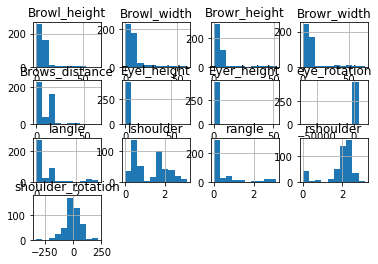

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
my_cool_df_dance = pd.read_csv("res.csv", sep='\t')

my_cool_df_dance.hist()

In [0]:
from pathlib import Path

def process_vid(infile, root='gdrive/My\ Drive/workshop/processed', **kwargs):
    outfile = Path(root) / infile.name
    params = []
    if 'face' in kwargs:
        params.append('--face')
    if 'hand' in kwargs:
        params.append('--hand')
    if 'body' in kwargs:
        params.append('--body {}'.format(kwargs['body']))

    p_str = ' '.join(params)
    print(p_str)
    ! cd openpose && ./build/examples/openpose/openpose.bin --video $infile --write_json ../json/ --display 0  --write_video $outfile $p_str

def process_video_file(start=0, maxlen=10, process=True, **kwargs):
    #fn = ! youtube-dl --get-filename -f 'bestvideo[ext=mp4,height<=480]' --output "%(title)s.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
    #fn = fn[0]
    #new_fn = fn.replace(' ', '_')[:20] + '.mp4'
    #! youtube-dl -f 'bestvideo[ext=mp4]' -o $new_fn https://www.youtube.com/watch?v=$YOUTUBE_ID
    #fn_cutted = Path(new_fn).stem + '_{}'.format(maxlen) + '.mp4'
    #print(fn_cutted)
    #! ffmpeg -y -loglevel info -ss $start -i $new_fn -t $maxlen $fn_cutted
    path = '/content/drive/My\ Drive/workshop/processed/Demo\ openpose\ hand\ \(1\).mp4'
    if process:
      process_vid(Path('') / path, '/', **kwargs)
    

In [0]:
process_video_file(start='00:00:00', maxlen=30, face=True, process=True)

--face
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libs

In [0]:
def process_vid(infile, root='gdrive/My\ Drive/workshop/processed', **kwargs):
    outfile = Path(root) / infile.name
    params = []
    if 'face' in kwargs:
        params.append('--face')
    if 'hand' in kwargs:
        params.append('--hand')
    if 'body' in kwargs:
        params.append('--body {}'.format(kwargs['body']))

    p_str = ' '.join(params)
    print(p_str)
    !mv ../$infile .
    print(infile)
    ! cd openpose && ./build/examples/openpose/openpose.bin --video $infile --write_json ../json/ --display 0  --write_video $outfile $p_str

def process_youtube(YOUTUBE_ID, start=0, maxlen=10, process=True, **kwargs):
    fn = ! youtube-dl --get-filename -f 'bestvideo[ext=mp4,height<=480]' --output "%(title)s.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
    fn = fn[0]
    new_fn = fn.replace(' ', '_')[:20] + '.mp4'
    ! youtube-dl -f 'bestvideo[ext=mp4]' -o $new_fn https://www.youtube.com/watch?v=$YOUTUBE_ID
    fn_cutted = Path(new_fn).stem + '_{}'.format(maxlen) + '.mp4'
    print(fn_cutted)
    ! ffmpeg -y -loglevel info -ss $start -i $new_fn -t $maxlen $fn_cutted
    if process:
      process_vid(Path('.') / fn_cutted, '/', **kwargs)
    return fn_cutted

In [0]:
ID = 'yvcPcRdlDYo'
process_youtube(ID, start='00:01:58', maxlen=17, face=True, process=True)

[youtube] yvcPcRdlDYo: Downloading webpage
[youtube] yvcPcRdlDYo: Downloading video info webpage
[youtube] yvcPcRdlDYo: Downloading MPD manifest
[download] HHH.mp4.mp4 has already been downloaded
[download] 100% of 1.24MiB
HHH.mp4_17.mp4
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine

'HHH.mp4_17.mp4'